In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data PreProcessing

In [3]:
df=pd.read_csv("A:\Fraud detection\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe["Time"], ["Amount"], ["Class"], ["V9"]

TypeError: 'method' object is not subscriptable

In [ ]:
df.shape

(284807, 31)

In [9]:
#Check for missing values

missing_values =df.isnull().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
classes = df["Class"].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

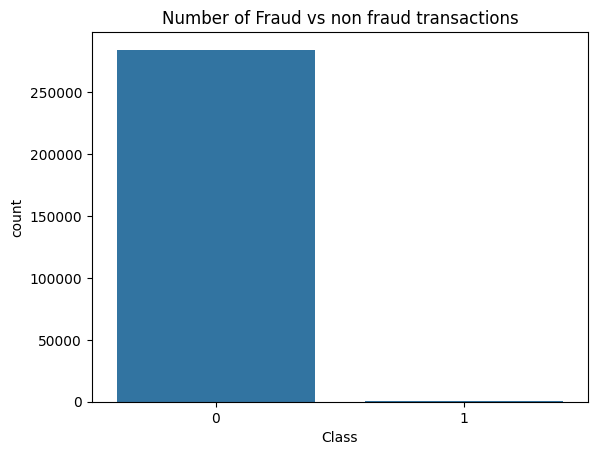

In [13]:
sns.countplot(x="Class", data=df)
plt.title("Number of Fraud vs non fraud transactions")
plt.show()

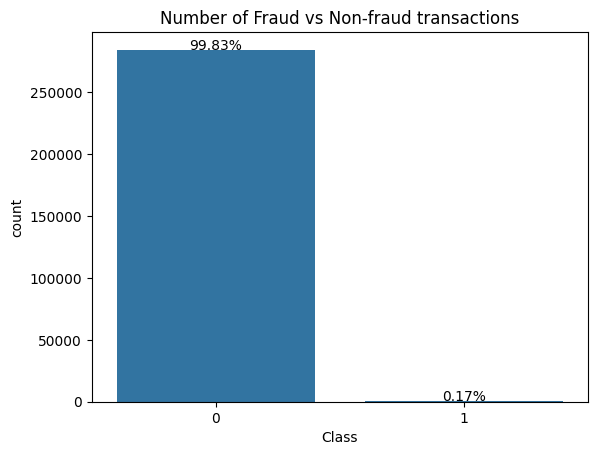

In [16]:
ax = sns.countplot(x="Class", data=df)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{(height/total)*100:.2f}%', ha="center")
plt.title("Number of Fraud vs Non-fraud transactions")
plt.show()

In [18]:
Fraud = df[df["Class"]==1]
Non_Fraud = df[df["Class"]==0]

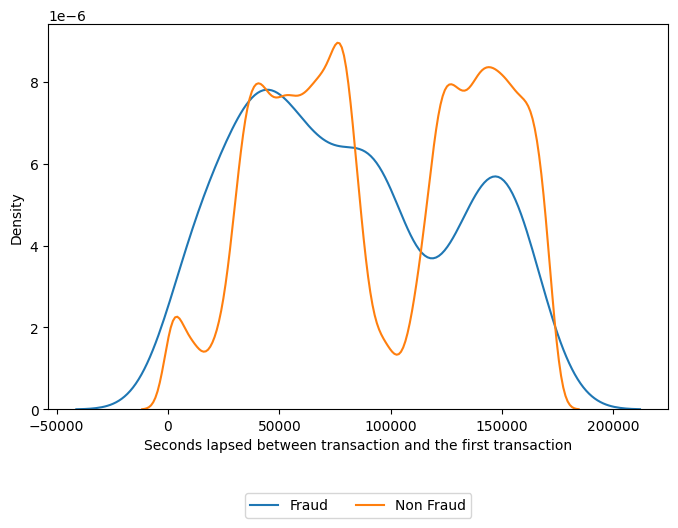

In [30]:
# Distribution plot

plt.figure(figsize=(8,5))
ax = sns.distplot(Fraud["Time"], label="Fraud", hist=False)
ax = sns.distplot(Non_Fraud["Time"], label="Non Fraud", hist=False)
ax.set(xlabel="Seconds lapsed between transaction and the first transaction")

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

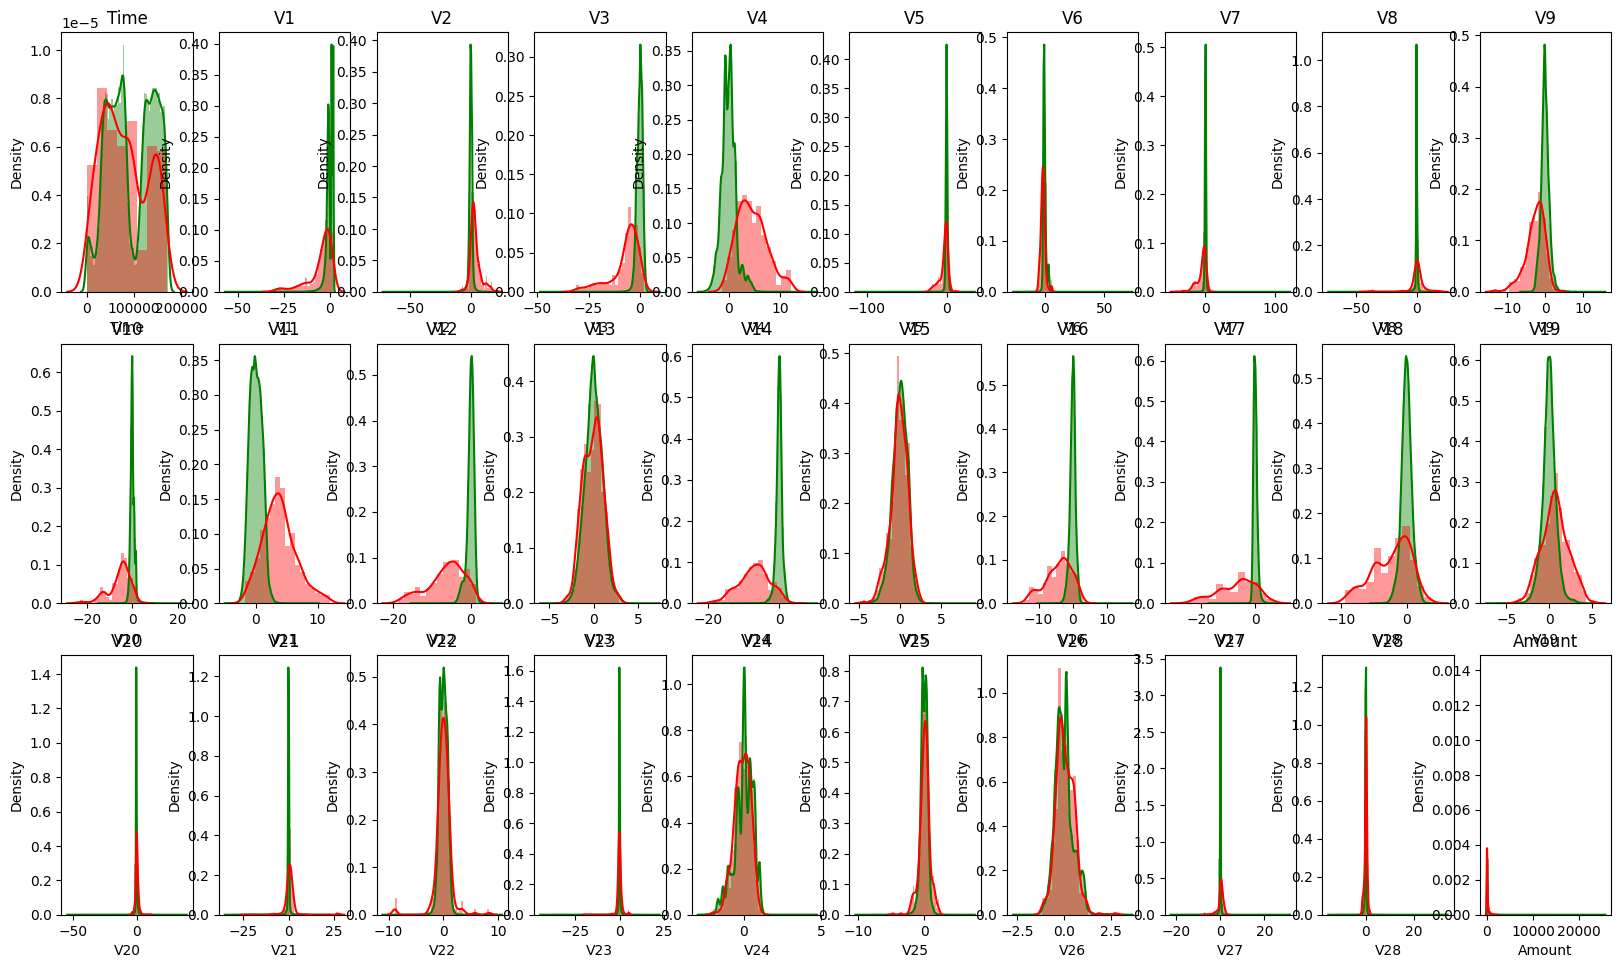

In [8]:
# Accumulating all columns unde one variable
cols = list(x.columns.values)

# plot the histogram of a variable from the dataset to see the skewness

Not_Fraud = df.Class ==0
Fraud = df.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(15,10,n+1)
    sns.distplot(x[col][Not_Fraud], color ="green")
    sns.distplot(x[col][Fraud], color ="red")
    plt.title(col, )
plt.show()

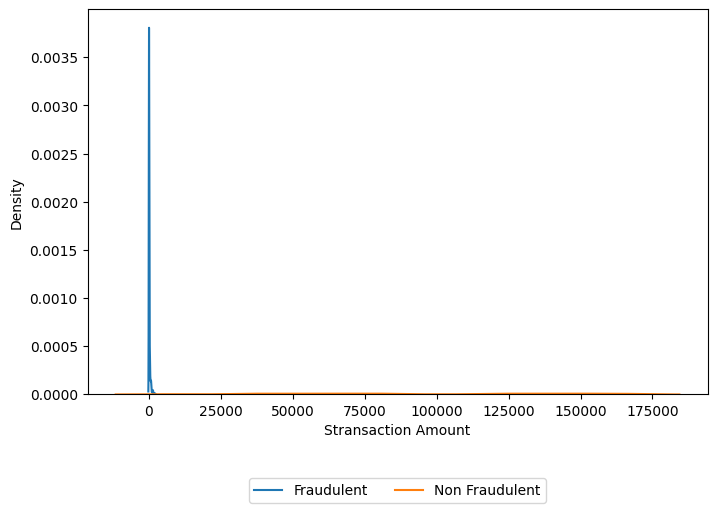

In [31]:

plt.figure(figsize=(8,5))
ax = sns.distplot(Fraud["Amount"], label="Fraudulent", hist=False)
ax = sns.distplot(Non_Fraud["Time"], label="Non Fraudulent", hist=False)
ax.set(xlabel="Stransaction Amount")

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

# Train test split

In [7]:
from sklearn.model_selection import train_test_split

x= df.drop(["Class"], axis=1)
y=df["Class"]

In [47]:
x_train, x_test, y_train, y_test =train_test_split(x, y, train_size=0.8, random_state=100)

# Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [54]:
x_train["Amount"] = scaler.fit_transform(x_train[["Amount"]])
x_test["Amount"] = scaler.transform(x_test[["Amount"]])


In [55]:
x_test.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


In [56]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,134039.0,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,124044.0,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,54997.0,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,137226.0,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,136246.0,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


# Models

In [66]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [67]:
result = pd.DataFrame(columns=["Model Name", "Accuracy", "F1-score", "ROC"])

In [68]:
# ROC Curve function

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr,label="ROC Curve (area = %0.2f)" % auc_score)
    plt.plot([0,1], [0,1], "k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False positive rate or [1 - true Negative rate]")
    plt.ylabel("True positive Rate")
    plt.title("Receiver operating characteristics")
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression

In [69]:
# import scikit logistic regression

from sklearn.linear_model import LogisticRegression

In [63]:
logistic = LogisticRegression(C=0.01)
logistic_model = logistic.fit(x_train, y_train)


In [93]:
# Prepare results function

def display_test_results(model_name, model):
    y_test_pred = model.predict(x_test)

    # Confusion Matrix

    print("--------------Confusion Matrix--------------")
    c_matrix =metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()

    # Classification report:
    print("--------------Classification Report--------------")
    print(classification_report(y_test, y_test_pred))

    print("--------------More Specific Classification Report--------------")
    TP = c_matrix[1,1]
    TN = c_matrix[0,0]
    FP = c_matrix[0,1]
    FN = c_matrix[1,0]

    #Accuracy
    print("Accuracy:-", metrics.accuracy_score(y_test, y_test_pred))


    # Sensitivity

    print("Sensitivity :-", TP/float(TP+TN))

    # Specificity 

    print("Specificity :-", TN/float(TN+FP))

    # f1 Score

    print("F1-Score :-", f1_score(y_test, y_test_pred))

    # Predicted Probability

    y_test_pred_proba = model.predict_proba(x_test)[:, 1]

    # roc_auc

    print("--------------ROC--------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot ROC Curve

    draw_roc(y_test, y_test_pred_proba)

    # Add all Metrics score in final results store

    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc(y_test, y_test_pred)]

# Predicting results

--------------Confusion Matrix--------------
[[56837    29]
 [   36    60]]


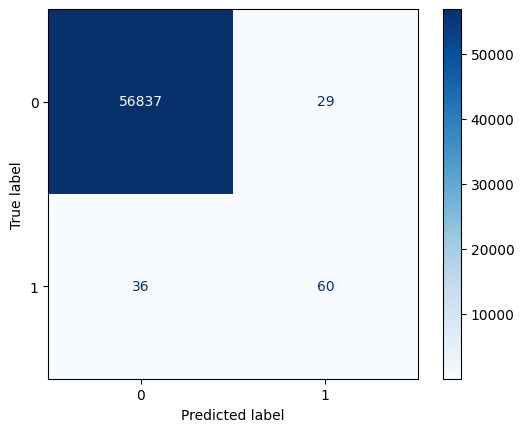

--------------Classification Report--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.67      0.62      0.65        96

    accuracy                           1.00     56962
   macro avg       0.84      0.81      0.82     56962
weighted avg       1.00      1.00      1.00     56962

--------------More Specific Classification Report--------------
Accuracy:- 0.9988588883817282
Sensitivity :- 0.0010545371460709703
Specificity :- 0.9994900291914325
F1-Score :- 0.6486486486486487
--------------ROC--------------


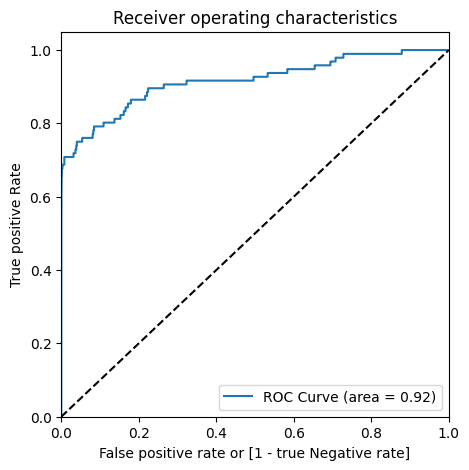

TypeError: 'numpy.float64' object is not callable

In [95]:
display_test_results("LogisticRegression", logistic_model)

# XGBoost


In [73]:
from xgboost import XGBClassifier

In [96]:
params ={ "learning rate" : 0.2,
         "max_depth": 2,
         "n_estimator": 200,
         "subsample": 0.9,
         "objective" : "binary : logistic"}

In [97]:
# Fit the model on training 

xgb_model = XGBClassifier(params=params)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning rate': 0.2, 'max_depth': 2, 'n_estimator': 200,
                      'objective': 'binary : logistic', 'subsample': 0.9}, ...)

Display results



--------------Confusion Matrix--------------
[[56859     7]
 [   25    71]]


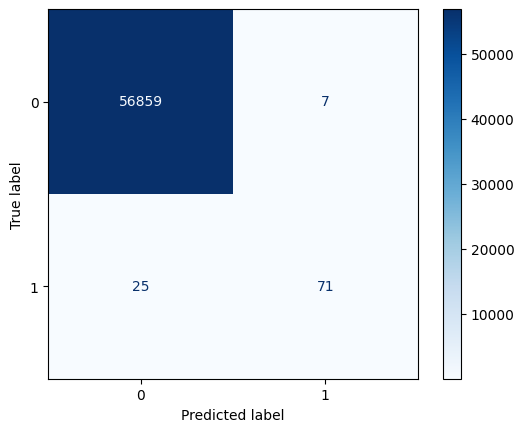

--------------Classification Report--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.74      0.82        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

--------------More Specific Classification Report--------------
Accuracy:- 0.9994382219725431
Sensitivity :- 0.0012471456174249077
Specificity :- 0.999876903597932
F1-Score :- 0.8160919540229885
--------------ROC--------------


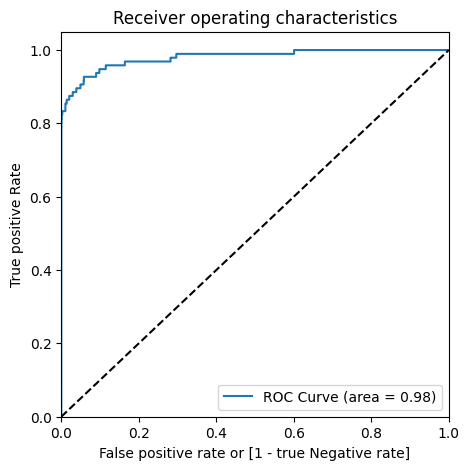

TypeError: 'numpy.float64' object is not callable

In [98]:
display_test_results("XG Boost", xgb_model)

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
# Model with optimal hyperameters
decision_tree_model = DecisionTreeClassifier(criterion= "gini",
                                             random_state=100,
                                             max_depth=5,
                                             min_samples_leaf=100,
                                             min_samples_split=100)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

Predicting results


--------------Confusion Matrix--------------
[[56836    30]
 [   40    56]]


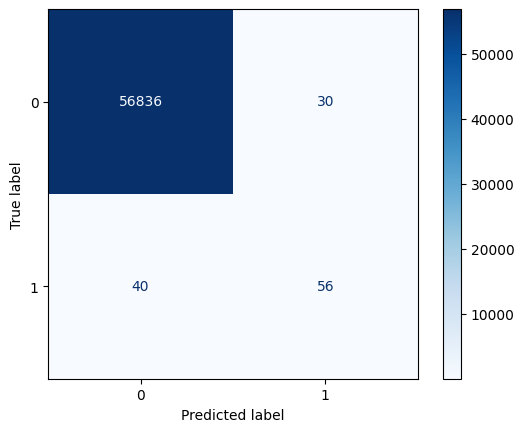

--------------Classification Report--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

--------------More Specific Classification Report--------------
Accuracy:- 0.9987711105649381
Sensitivity :- 0.000984321169936019
Specificity :- 0.9994724439911371
F1-Score :- 0.6153846153846155
--------------ROC--------------


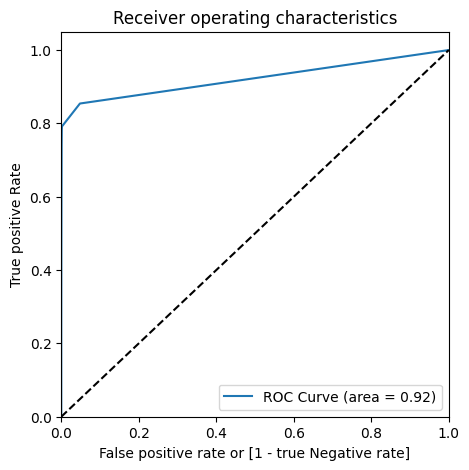

TypeError: 'numpy.float64' object is not callable

In [100]:
display_test_results("Decision Tree", decision_tree_model)

# Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
random_forest_model = RandomForestClassifier(bootstrap=True,
                                             max_depth=5,
                                             min_samples_leaf=50,
                                             min_samples_split=50,
                                             max_features=10,
                                             n_estimators=100)

In [85]:
# Fit model
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

Predicting results

--------------Confusion Matrix--------------
[[56845    21]
 [   36    60]]


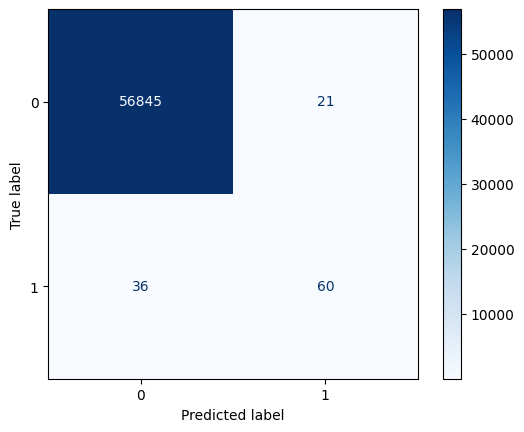

--------------Classification Report--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.62      0.68        96

    accuracy                           1.00     56962
   macro avg       0.87      0.81      0.84     56962
weighted avg       1.00      1.00      1.00     56962

--------------More Specific Classification Report--------------
Accuracy:- 0.9989993328885924
Sensitivity :- 0.001054388893770319
Specificity :- 0.999630710793796
F1-Score :- 0.6779661016949152
--------------ROC--------------


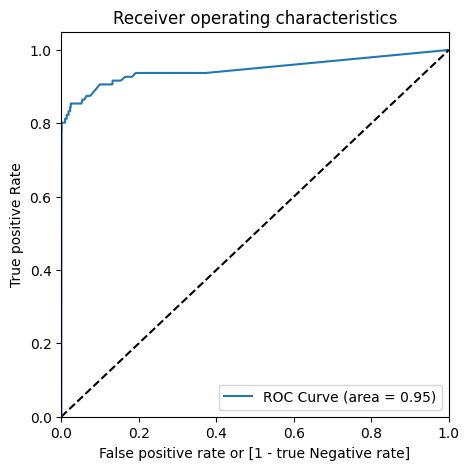

TypeError: 'numpy.float64' object is not callable

In [86]:
display_test_results("Random Forest", random_forest_model)

# Summary Results

In [103]:
results.sort_values(by="ROC", ascending=False)

,Model Name,Accuracy,F1-score,ROC


In [104]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [105]:
df.shape

(284807, 31)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28